In [1]:
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as n
import pandas as p
from sklearn.preprocessing import LabelEncoder
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split

In [2]:
df=p.read_csv("G://programs//sonar.csv")

In [3]:
print(len(df.columns))

61


In [4]:
df.shape

(208, 61)

In [5]:
df.head(2)

,0,1,2,3,4,5,6,7,8,9,...,51,52,53,54,55,56,57,58,59,60
0,0.0200,0.0371,0.0428,0.0207,0.0954,0.0986,0.1539,0.1601,0.3109,0.2111,...,0.0027,0.0065,0.0159,0.0072,0.0167,0.018,0.0084,0.0090,0.0032,R
1,0.0453,0.0523,0.0843,0.0689,0.1183,0.2583,0.2156,0.3481,0.3337,0.2872,...,0.0084,0.0089,0.0048,0.0094,0.0191,0.014,0.0049,0.0052,0.0044,R


In [6]:
def read_database():
    X=df[df.columns[1:60]].values
    y=df[df.columns[60]]
    encoder=LabelEncoder()
    encoder.fit(y)
    y=encoder.transform(y)
    Y=one_hot_encode(y)
    return(X,Y,y)

In [7]:
def feature_normalize(features):
    mu=n.mean(features,axis=0)         #normalize the features of the dataset
    sigma=n.std(features,axis=0)
    normalize_features=(features-mu)/sigma
    return(normalize_features)

In [8]:
#appending the bias

def append_bias_reshape(features):
    n_training_samples=features.shape[0]
    n_dim=features.shape[1]
    features=np.reshape(np.c_[np.ones(n_training_samples),features],[n_training_samples,n_dim+1])
    return (features)


In [9]:
#defining one hot encode function

def one_hot_encode(labels):
    n_labels=len(labels)
    n_unique_labels=len(n.unique(labels))
    one_hot_encode=n.zeros((n_labels,n_unique_labels))
    one_hot_encode[n.arange(n_labels),labels]=1
    return(one_hot_encode)

In [10]:
#plotting graph for data

def plot_points(features,labels):
    normal=n.where(labels==0)
    outliers=n.where(labels==1)
    fig=plt.figure(figsize=(10,8))
    plt.plot(features[normal,0],features[normal,1],'bx')
    plt.plot(features[outliers,0],features[outliers,1],'ro')
    plt.xlabel('Latency(ms)')
    plt.ylabel('Throughput(mb/s)')
    plt.show()

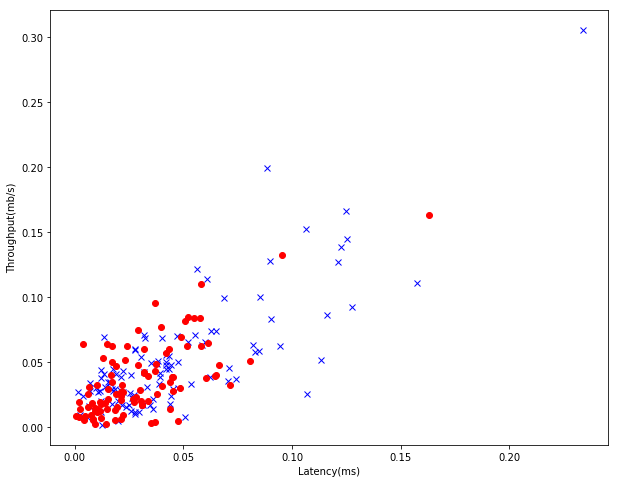

In [11]:
#read the data

X,Y,y=read_database()
normalized_features=feature_normalize(X)
plot_points(X,y)

In [12]:
#transform the data in training and testing values
X,Y=shuffle(X,Y,random_state=0)
train_x,test_x,train_y,test_y=train_test_split(X,Y,test_size=0.20,random_state=42)

In [13]:
print(train_x.shape)
print(test_x.shape)
print(train_y.shape)
print(test_y.shape)

(166, 59)
(42, 59)
(166, 2)
(42, 2)


In [25]:
#define and initialize the variables to work with the tensors
learning_rate=0.1
training_epochs=10

In [26]:
cost_history=n.empty(shape=[1],dtype=float)

In [27]:
n_dim=X.shape[1]
n_class=2

In [28]:
x=tf.placeholder(tf.float32,[None,n_dim])
w=tf.Variable(tf.zeros([n_dim,n_class]))
b=tf.Variable(tf.zeros([n_class]))

In [29]:
#initialize the vraiables
init=tf.global_variables_initializer()

In [30]:
#define the cost function
y_=tf.placeholder(tf.float32,[None,n_class])
y=tf.nn.softmax(tf.matmul(x,w)+b)


In [31]:
cost_function=tf.reduce_mean(-tf.reduce_sum((y_ *tf.log(y)),reduction_indices=[1]))
training_step=tf.train.GradientDescentOptimizer(learning_rate).minimize(cost_function)


In [32]:
sess=tf.Session()
sess.run(init)
mse_history=[]

In [33]:
for epoch in range(training_epochs):
    sess.run(training_step,feed_dict={x:train_x,y_:train_y})
    cost=sess.run(cost_function,feed_dict={x:train_x,y_:train_y})
    cost_history=n.append(cost_history,cost)
    pred_y=sess.run(y,feed_dict={x:test_x})
    print('epoch:',epoch,'-','cost:',cost)
    
    
    mse=tf.reduce_mean(tf.square(pred_y-test_y))
    mse_history.append(sess.run(mse))


epoch: 0 - cost: 0.6827111
epoch: 1 - cost: 0.67814267
epoch: 2 - cost: 0.67543525
epoch: 3 - cost: 0.67334354
epoch: 4 - cost: 0.6714755
epoch: 5 - cost: 0.66970557
epoch: 6 - cost: 0.6679922
epoch: 7 - cost: 0.6663212
epoch: 8 - cost: 0.664687
epoch: 9 - cost: 0.66308695


mse: [0.25610843795300936, 0.26012373947808415, 0.2622509606555414, 0.26311033732400446, 0.2631961174094751, 0.2628306642911319, 0.262209883962603, 0.261449104637724, 0.2606150649931261, 0.2597459954392716]


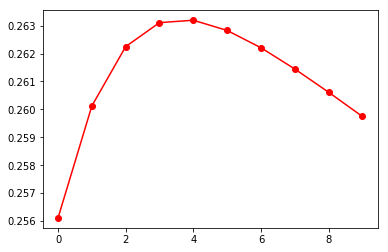

In [34]:
print('mse:',mse_history)
plt.plot(mse_history,'ro-')
plt.show()

In [36]:
correct_prediction=tf.equal(tf.argmax(y,1),tf.argmax(y_,1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
print(sess.run(accuracy,feed_dict=({x:train_x, y_:train_y})))

0.57228917
